Tracking API

In [4]:
import cv2

In [14]:
# 객체의 움직임 따라가기
# OpenCV 객체 추적기 리스트: MIL, KCF, CSRT 추적기 생성 함수들
trackers = [cv2.TrackerMIL_create,  cv2.TrackerKCF_create, cv2.TrackerCSRT_create]

trackerIdx = 0  # 현재 선택된 추적기 인덱스
tracker = None  # 추적기 객체 초기값
isFirst = True  # 비디오 첫 실행 여부 체크
video_src = './img/highway.mp4'  # 비디오 파일 경로

cap = cv2.VideoCapture(video_src)  # 비디오 캡처 객체 생성
fps = cap.get(cv2.CAP_PROP_FPS)   # 비디오 FPS 가져오기
delay = int(1000/fps)              # 프레임 간 딜레이 (ms 단위)
win_name = 'Tracking API'          # 윈도우 이름

while cap.isOpened():
    ret, frame = cap.read()         # 비디오 프레임 읽기
    if not ret:
        break                      # 프레임 읽기 실패 시 종료
    
    img_draw = frame.copy()        # 프레임 복사 (그리기용)
    
    if tracker is None:
        # 추적기가 없으면 안내 문구 표시
        cv2.putText(img_draw,'Press the Space button', (100,80),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2,cv2.LINE_AA)
    else:
        # 추적기가 있으면 현재 프레임에서 객체 위치 업데이트
        ok, bbox = tracker.update(frame)
        (x,y,w,h) = bbox
        
        if ok:
            # 추적 성공 시 바운딩 박스 그리기
            cv2.rectangle(img_draw, (int(x), int(y)), (int(x+w), int(y+h)),
                          (0,255,0), 2, 1)
        else:
            # 추적 실패 시 안내 문구 표시
            cv2.putText(img_draw,'Tracking Fail',(100,90),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2,cv2.LINE_AA)
    
    # 현재 사용중인 추적기 클래스 이름 표시
    trackerName = tracker.__class__.__name__
    cv2.putText(img_draw, str(trackerIdx)+':'+ trackerName, (100,20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,255,0),2,cv2.LINE_AA)
    
    # 결과 영상 출력
    cv2.imshow(win_name, img_draw)
    
    key = cv2.waitKey(delay) & 0xff  # 키 입력 대기 (딜레이만큼), & 0xff는 하위 8비트 마스크
    
    # 키 이벤트 처리
    if key == ord(' ') or (video_src != 0 and isFirst):
        # 스페이스바 누르거나, 첫 실행일 때 객체 선택(ROI) 창 띄우기
        isFirst = False
        roi = cv2.selectROI(win_name, frame, False)  # ROI 선택 (마우스로 사각형 선택)
        
        if roi[2] and roi[3]:  # 선택된 ROI가 유효한 경우(너비와 높이가 0이 아닌 경우)
            tracker = trackers[trackerIdx]()  # 선택된 추적기 생성
            isInit = tracker.init(frame, roi)  # 추적기 초기화
    
    elif key in range(48, 51):  # 숫자 0,1,2 키 입력 처리 (ASCII 코드 48~50)
        trackerIdx = key - 48  # trackerIdx 변경 (0,1,2)
        if bbox is not None:
            tracker = trackers[trackerIdx]()  # 해당 인덱스의 추적기 생성
            isInit = tracker.init(frame, bbox)  # 기존 바운딩 박스로 초기화
    
    elif key == 27:  # ESC 키 입력 시 종료
        break

# 자원 해제
cap.release()
cv2.destroyAllWindows()

        
        
    
                
    

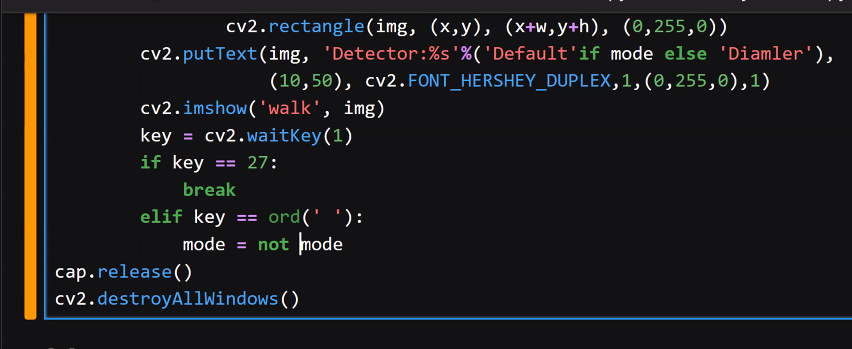

In [ ]:
https://discordapp.com/channels/1386894578510069800/1386894579755909171/1400711505371992174

In [ ]:
# HOG 디스크립터
# 보행자 인식
import cv2

# HOG 디스크립터 - 보행자 인식
hogdef = cv2.HOGDescriptor()
hogdef.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Daimler 디텍터 위한 HOG 설정
hogdaim = cv2.HOGDescriptor((48,96), (16,16), (8,8), (8,8), 9)
hogdaim.setSVMDetector(cv2.HOGDescriptor_getDaimlerPeopleDetector())

cap = cv2.VideoCapture('./img/walking.avi')  # 비디오 캡처 객체 생성
mode = True  # 기본 디텍터(True: 기본 HOG, False: Daimler HOG)

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break

    if mode:
        found, _ = hogdef.detectMultiScale(img)
        for (x, y, w, h) in found:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
    else:
        found, _ = hogdaim.detectMultiScale(img)
        for (x, y, w, h) in found:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 텍스트 출력 (현재 디텍터 종류)
    detector_name = 'Default' if mode else 'Daimler'
    cv2.putText(img, f'Detector: {detector_name}', (10, 50), 
                cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 0), 1)

    cv2.imshow('walk', img)

    key = cv2.waitKey(1)
    if key == 27:  # ESC 종료
        break
    elif key == ord(' '):  # 스페이스바로 디텍터 변경
        mode = not mode

cap.release()
cv2.destroyAllWindows()


In [28]:
#Haar 필터
# 사람 얼굴 검출
# people.jpg
# './weights/파일명'
import cv2

# 이미지 불러오기 및 리사이즈
img = cv2.imread('./img/people.jpg')
img_resize = cv2.resize(img, (755, 500))

# Haar cascade 모델 로드 (얼굴 인식용)
cascade_face_detector = cv2.CascadeClassifier('./weights/haarcascade_frontalface_default.xml')

# 얼굴 검출
face_detections = cascade_face_detector.detectMultiScale(img_resize, scaleFactor=1.57, minNeighbors=4)

# 검출된 얼굴에 사각형 그리기
for (x, y, w, h) in face_detections:
    cv2.rectangle(img_resize, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 출력
cv2.imshow('people', img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [33]:
# 눈 추출
# 하이퍼파라미터를 통해 성능 높이기
img = cv2.imread('./img/people.jpg')
img_resize = cv2.resize(img,(755,500))

cascade_eye_detector= cv2.CascadeClassifier('./weights/haarcascade_eye.xml')
eye_detections = cascade_eye_detector.detectMultiScale(img_resize,
                                                      scaleFactor=1.05,
                                                      minNeighbors=6,
                                                      minSize=(10,10),
                                                      maxSize=(30,30))

for (x,y,w,h) in eye_detections:
    cv2.rectangle(img_resize, (x,y),(x+w,y+h),(0,255,255),2)
cv2.imshow('eye',img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()
                  

In [34]:
# 얼굴과 눈 추출
# 하이퍼파라미터를 통해 성능 높이기
img = cv2.imread('./img/people.jpg')
img_resize = cv2.resize(img,(755,500))

# Haar cascade 모델 로드 (얼굴 인식용)
cascade_face_detector = cv2.CascadeClassifier('./weights/haarcascade_frontalface_default.xml')
cascade_eye_detector= cv2.CascadeClassifier('./weights/haarcascade_eye.xml')

# 얼굴 검출
face_detections = cascade_face_detector.detectMultiScale(img_resize, scaleFactor=1.57, minNeighbors=4)

eye_detections = cascade_eye_detector.detectMultiScale(img_resize,
                                                      scaleFactor=1.05,
                                                      minNeighbors=6,
                                                      minSize=(10,10),
                                                      maxSize=(30,30))

for (x,y,w,h) in eye_detections:
    cv2.rectangle(img_resize, (x,y),(x+w,y+h),(0,255,255),2)

# 검출된 얼굴에 사각형 그리기
for (x, y, w, h) in face_detections:
    cv2.rectangle(img_resize, (x, y), (x + w, y + h), (0, 255, 0), 2)

    
cv2.imshow('all',img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()
                  

### 얼굴인식

In [36]:
import os
import numpy as np
import cv2
from PIL import Image

In [35]:
!pip install pillow # PIL 

In [40]:
import os
import numpy as np
from PIL import Image

train_image_path = './img/yalefaces/yalefaces/train'

# 이미지 파일명 불러오기
all_train_img_name = os.listdir(train_image_path)

# 전체 이미지 경로 만들기
all_train_img_path = []
for i in all_train_img_name:
    new_path = os.path.join(train_image_path, i)
    all_train_img_path.append(new_path)

# 이미지 전처리 함수 정의
def fetch_preprocessed_image_data(image_paths):
    faces_of_image = []
    ids_of_image = []
    for image_path in image_paths:
        image = Image.open(image_path).convert('L')  # Grayscale 변환
        image_np = np.array(image, 'uint8')          # uint8로 변환
        image_file_name = os.path.split(image_path)[1]
        id_of_image = int(image_file_name.split('.')[0].replace('subject', ''))
        ids_of_image.append(id_of_image)
        faces_of_image.append(image_np)
    return np.array(ids_of_image), faces_of_image

# 함수 호출 예시
ids, faces = fetch_preprocessed_image_data(all_train_img_path)


        
        

    

In [42]:
ids_of_train_image,faces_of_train_image = fetch_preprocessed_image_data(all_train_img_path)


In [43]:
!pip install scikit-image

In [48]:
from skimage.feature import local_binary_pattern

og_image = faces_of_train_image[5]
lbp_image = local_binary_pattern(og_image,8*3,3)
lbp_image = ((lbp_image - lbp_image.min())/(lbp_image.max()-lbp_image.min()))*255

lbp_image = lbp_image.astype(np.uint8)

In [50]:
cv2.imshow('or',og_image)
cv2.imshow('xor',lbp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
# 객체 생성
lbph_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=5, neighbors=15, grid_x=10, grid_y=10)
lbph_recognizer.train(faces_of_train_image, np.array(ids_of_train_image))


In [60]:
test_image_path = './img/yalefaces/yalefaces/test'

all_test_image_file_name = os.listdir(test_image_path)
all_test_image_paths = [os.path.join(test_image_path,f) for f in all_test_image_file_name]
ids_of_test_image,faces_of_train_image = fetch_preprocessed_image_data(all_test_image_paths)
